In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [73]:
df=pd.read_csv('csv/ks_2018.csv',index_col='ID')
df.head()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [74]:
shape_map = {"failed":"x", "successful":"v", "canceled":"x", "undefined":"x", "live":"x", "suspended":"x"}
color_map = {"failed":"red", "successful":"blue", "canceled":"red", "undefined":"red", "live":"red", "suspended":"red"}

df['shapes']= df.state.map(shape_map)
df['color']= df.state.map(color_map)

converted_deadline = pd.to_datetime(df.deadline)
converted_launched_date=pd.to_datetime(df.launched)
df['days_between']=converted_deadline-converted_launched_date
df['days_between']=df['days_between'].apply(lambda x : x.days)

(0.0, 5000000.0)

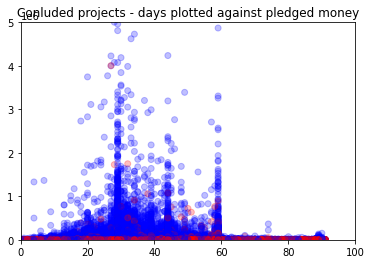

In [75]:
shape_vector=list(df.state.map(shape_map))
color_vector=list(df.state.map(color_map))

plt.scatter(x=df.days_between,y=df.pledged , c=color_vector,alpha=0.25)
plt.title("Conluded projects - days plotted against pledged money")
plt.xlim(0,100)
plt.ylim(0,5000000)

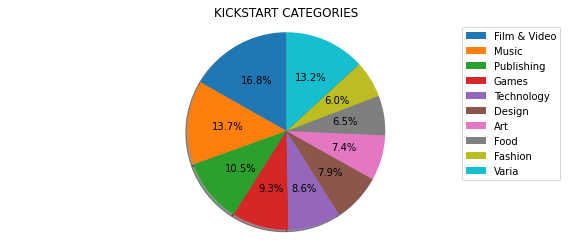

In [76]:
number_of_records=df.shape[0]
vc=df.main_category.value_counts()
vc_in_percentages=vc/number_of_records

#the sections that are smaller than 3%
smaller_section= vc_in_percentages[vc_in_percentages<0.03]
vc_in_percentages= vc_in_percentages[vc_in_percentages>=0.03]

keywords,percentages=zip(*vc_in_percentages.items())
keywords=list(keywords)
percentages=list(percentages)
keywords.append('Varia')
percentages.append(smaller_section.sum())
        
fig1, ax1 = plt.subplots()
ax1.pie(percentages, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("KICKSTART CATEGORIES")
plt.legend(keywords,loc="upper right")
fig1.set_figwidth(10)
plt.show()